# Discrete (k-)DPPs

State of the art exact samplers for (k-)DPPs

In [1]:
%pylab inline

%load_ext autoreload
%autoreload 2

from dppy.discrete_dpps import *
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


# Toy example: uniform spanning tree (UST) kernel

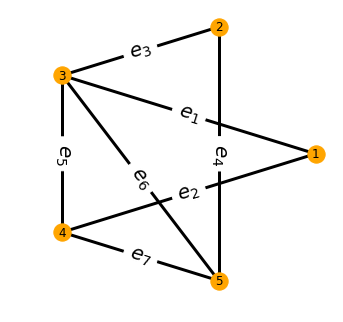

In [2]:
g = nx.Graph()
g.add_edges_from([(0,2), (0,3), (1,2), (1,4), (2,3), (2,4), (3,4)])
nx.set_node_attributes(g, 'color', 'orange')

edge_lab = [r'$e_{}$'.format(i) for i in range(1,g.number_of_edges()+1)]
edge_labels = dict(zip(g.edges(), edge_lab))
vertex_labels = dict(zip(g.nodes(), [i for i in range(1,g.number_of_nodes()+1)]))

fig = plt.figure(figsize=(4,4))

nx.draw_circular(g, node_color='orange', width = 3)
pos=nx.circular_layout(g)
nx.draw_networkx_labels(g,pos,vertex_labels)
nx.draw_networkx_edge_labels(g, pos, edge_labels = edge_labels, font_size= 20)

Inc_Mat=nx.incidence_matrix(g,oriented=True).toarray()

In [3]:
# Projection Kernel onto the rows of the incidence matrix
A=Inc_Mat[:-1,:]
K = A.T.dot(np.linalg.inv(A.dot(A.T))).dot(A)

### DPP with kernel K

In [4]:
UST = Discrete_DPP(kernel=K, ensemble_type='K', projection_kernel=True)
print(UST) # or UST.info()

Discrete DPP defined by:
- K-ensemble on 7 items
- Projection kernel: Yes
- sampling mode = GS
- number of samples = 0


##### The different `sampling_mode`s  available are:
- `GS`: Gram-Schmidt (equiv. Cholesky) like conditional updates
- `Schur`: Schur complement like conditional updates
- `KuTa12`: original sampling algorithm in Kulesza's thesis

In [5]:
UST.flush_samples()

for samp_mod in ('GS','Schur','KuTa12'):
    for _ in range(5):
        UST.sample_exact(sampling_mode=samp_mod)
        
UST.list_of_samples

[array([6, 1, 2, 4]),
 array([6, 1, 5, 3]),
 array([6, 0, 4, 2]),
 array([3, 0, 2, 6]),
 array([6, 1, 0, 3]),
 array([0, 2, 5, 1]),
 array([1, 3, 5, 6]),
 array([3, 5, 4, 0]),
 array([2, 4, 5, 1]),
 array([3, 4, 2, 1]),
 array([1, 6, 4, 3]),
 array([6, 2, 0, 3]),
 array([1, 2, 4, 3]),
 array([4, 1, 2, 3]),
 array([6, 1, 2, 5])]

### k-DPP with kernel K

In [6]:
size = 3
UST_k = Discrete_kDPP(size=size, kernel=K, ensemble_type='K', projection_kernel=True)
print(UST_k) # or UST_k.info()

Discrete k-DPP with k=3 defined by:
- K-ensemble on 7 items
- Projection kernel: Yes
- sampling mode = GS
- number of samples = 0


In [7]:
UST_k.flush_samples()

for samp_mod in ('GS','Schur','KuTa12'):
    for _ in range(5):
        UST_k.sample_exact(sampling_mode=samp_mod)
        
UST_k.list_of_samples

[array([4, 0, 3]),
 array([3, 6, 5]),
 array([3, 2, 0]),
 array([5, 3, 1]),
 array([6, 3, 0]),
 array([6, 3, 0]),
 array([5, 1, 3]),
 array([0, 2, 5]),
 array([6, 0, 2]),
 array([6, 1, 2]),
 array([5, 0, 3]),
 array([4, 0, 2]),
 array([2, 1, 4]),
 array([0, 6, 3]),
 array([6, 1, 2])]

Generally, passing `projection_kernel=True`, diagonalisation is not performed at the creation of the object since it is not necessay for the sampling phase. On the contrary,, passing `projection_kernel=False`, diagonalisation is performed.

For DPPs:
- Passing `ensemble_type='K'`, the parameters of the Bernoulli variables used for sampling =
    - eig_vals of K.

- Passing `ensemble_type='L'`, the parameters of the Bernoulli variables used for sampling =
    - eig_vals/(1+eig_vals) of L.
    
For k-DPPs, elementary-symmetric polynomials are applied to the above Bernoulli parameters and used for sampling.

In [8]:
UST = Discrete_DPP(kernel=K, ensemble_type='K', projection_kernel=False)
print(UST.ber_params_sampling)

UST = Discrete_DPP(kernel=K, ensemble_type='L', projection_kernel=False)
print(UST.ber_params_sampling)

[-1.31071400e-16  2.11222874e-16  8.88178420e-16  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00]
[-1.31071400e-16  2.11222874e-16  8.88178420e-16  5.00000000e-01
  5.00000000e-01  5.00000000e-01  5.00000000e-01]


### Display the kernel as a heatmap

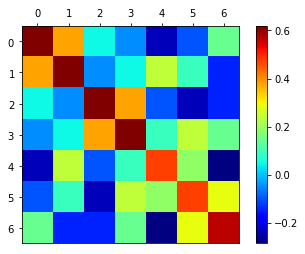

In [9]:
UST.plot()